### Analiza demografskih podataka živorođeni prema spolu i mjesecu rođenja od 1998. do 2021. godine.

Podaci su preuzeti s [Državnog zavoda za statistiku Republike Hrvatske](https://web.dzs.hr/PXWeb/Selection.aspx?px_path=Stanovni%c5%a1tvo__Vitalna%20statistika__Ro%c4%91eni&px_tableid=SV112.px&px_language=hr&px_db=Stanovni%c5%a1tvo&rxid=a4293dc7-ff9a-4be7-89e6-ef64d55def17).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import torch
import torch.nn as nn
import torch.optim as optim

Dohvaćanje podataka u CSV obliku.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MateoJaksic/Analiza-demografskih-podataka/main/podaci.csv?token=GHSAT0AAAAAACIKYZDTHSB5YUG2SWRMDIHYZNWLHIA', delimiter=";")

df = df.rename(columns={'Mjesec rođenja': 'Mjesec'})

In [4]:
rodenih_po_godini = {}
for godina in range(1998, 2021+1):
  rodenih_po_godini[godina] = df[str(godina)].sum()

Grafički prikaz ukupnog broja rođenih u Republici Hrvatskoj u vremenskom razdoblju od 1998. do 2021. godine.

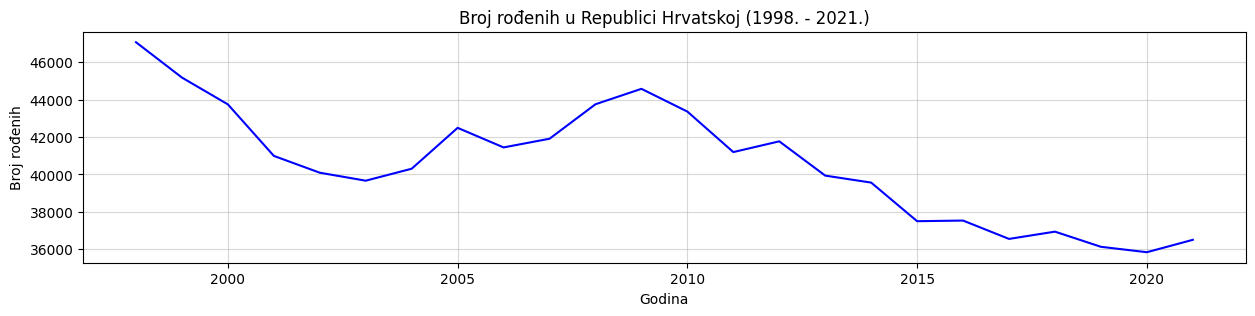

In [8]:
import matplotlib.pyplot as plt

rodenih_po_godini_keys = rodenih_po_godini.keys()
rodenih_po_godini_values = rodenih_po_godini.values()

plt.figure(1, [15, 3])
plt.plot(rodenih_po_godini_keys, rodenih_po_godini_values, color='blue')
plt.grid(True, alpha=0.5)
plt.xlabel('Godina')
plt.ylabel('Broj rođenih')
plt.title('Broj rođenih u Republici Hrvatskoj (1998. - 2021.)')
plt.show()

Tablični prikaz broja rođenih u Republici Hrvatskoj po godini u vremenskom razdoblju od 1998. do 2021. godine.

In [9]:
stopa_promjene = []
for godina in rodenih_po_godini_keys:
  if godina == 1998:
    stopa_promjene.append('')
  else:
    stopa_promjene.append(format((100 * (rodenih_po_godini[godina] - rodenih_po_godini[godina-1])/rodenih_po_godini[godina-1]), '.2f'))

for indeks in range(len(stopa_promjene)):
  if indeks != 0:
      if float(stopa_promjene[indeks]) > 0:
        stopa_promjene[indeks] = '+' + str(stopa_promjene[indeks]) + '%'
      else:
        stopa_promjene[indeks] = str(stopa_promjene[indeks]) + '%'

podaci = {
    'Godina': rodenih_po_godini_keys,
    'Broj rođenih': rodenih_po_godini_values,
    'Promjena': stopa_promjene
}

broj_rodenih_df = pd.DataFrame(podaci)
broj_rodenih_df = broj_rodenih_df.set_index('Godina')

broj_rodenih_df = tabulate(broj_rodenih_df, headers=['Godina', 'Broj rođenih', 'Promjena'], tablefmt='fancy_grid')

print(broj_rodenih_df)

najvise_rodenih = max(rodenih_po_godini, key=rodenih_po_godini.get)
najmanje_rodenih = min(rodenih_po_godini, key=rodenih_po_godini.get)

ekstremi = {
    'Ekstrem': ['Maksimum', 'Minimum'],
    'Godina': [najvise_rodenih, najmanje_rodenih],
    'Broj rođenih': [rodenih_po_godini[najvise_rodenih], rodenih_po_godini[najmanje_rodenih]]
}

maksimum_rodenih_df = pd.DataFrame(ekstremi)
maksimum_rodenih_df = maksimum_rodenih_df.set_index('Ekstrem')

maksimum_rodenih_df = tabulate(maksimum_rodenih_df, headers=['Ekstrem', 'Godina', 'Broj rođenih'], tablefmt='fancy_grid')

print(maksimum_rodenih_df)


╒══════════╤════════════════╤════════════╕
│   Godina │   Broj rođenih │ Promjena   │
╞══════════╪════════════════╪════════════╡
│     1998 │          47068 │            │
├──────────┼────────────────┼────────────┤
│     1999 │          45179 │ -4.01%     │
├──────────┼────────────────┼────────────┤
│     2000 │          43746 │ -3.17%     │
├──────────┼────────────────┼────────────┤
│     2001 │          40993 │ -6.29%     │
├──────────┼────────────────┼────────────┤
│     2002 │          40094 │ -2.19%     │
├──────────┼────────────────┼────────────┤
│     2003 │          39668 │ -1.06%     │
├──────────┼────────────────┼────────────┤
│     2004 │          40307 │ +1.61%     │
├──────────┼────────────────┼────────────┤
│     2005 │          42492 │ +5.42%     │
├──────────┼────────────────┼────────────┤
│     2006 │          41446 │ -2.46%     │
├──────────┼────────────────┼────────────┤
│     2007 │          41910 │ +1.12%     │
├──────────┼────────────────┼────────────┤
│     2008 

Razdvajanje podataka po spolu.

In [10]:
muski_df = df[df['Spol'] == 'Muški']
muski_df = muski_df.drop('Spol', axis=1)

zenski_df = df[df['Spol'] == 'Ženski']
zenski_df = zenski_df.drop('Spol', axis=1)

muski_rodenih_po_godini = {}
zenski_rodenih_po_godini = {}
for godina in range(1998, 2021+1):
  muski_rodenih_po_godini[str(godina)] = muski_df[str(godina)].sum()
  zenski_rodenih_po_godini[str(godina)] = zenski_df[str(godina)].sum()

muski_rodenih_po_godini_keys = muski_rodenih_po_godini.keys()
muski_rodenih_po_godini_values = muski_rodenih_po_godini.values()
zenski_rodenih_po_godini_keys = zenski_rodenih_po_godini.keys()
zenski_rodenih_po_godini_values = zenski_rodenih_po_godini.values()

Grafički prikaz broja rođenih u Republici Hrvatskoj po spolu u vremenskom razdoblju od 1998. do 2021. godine.

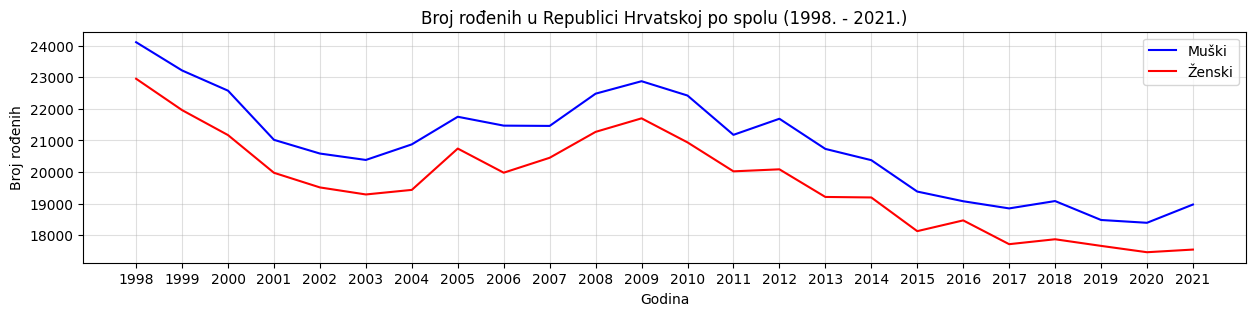

In [42]:
plt.figure(1, [15,3])
plt.plot(muski_rodenih_po_godini_keys, muski_rodenih_po_godini_values, color='blue', label='Muški')
plt.plot(zenski_rodenih_po_godini_keys, zenski_rodenih_po_godini_values, color='red', label='Ženski')
plt.grid(True, alpha=0.40)
plt.xlabel('Godina')
plt.ylabel('Broj rođenih')
plt.title('Broj rođenih u Republici Hrvatskoj po spolu (1998. - 2021.)')
plt.legend()
plt.show()

Tablični prikaz broja rođenih u Republici Hrvatskoj po spolu u vremenskom razdoblju od 1998. do 2021. godine.

In [19]:
muski_postotak_po_godini = []
zenski_postotak_po_godini = []

for godina in range(1998, 2021+1):
  muski_postotak_po_godini.append(format(round(100 * (muski_rodenih_po_godini[str(godina)] / rodenih_po_godini[godina]), 2), '.2f'))
  zenski_postotak_po_godini.append(format(round(100 * (zenski_rodenih_po_godini[str(godina)] / rodenih_po_godini[godina]), 2), '.2f'))

In [20]:
for indeks in range(0, len(muski_postotak_po_godini)):
  muski_postotak_po_godini[indeks] = str(muski_postotak_po_godini[indeks]) + '%'
  zenski_postotak_po_godini[indeks] = str(zenski_postotak_po_godini[indeks]) + '%'

In [21]:
podaci = {
    'Godina': rodenih_po_godini_keys,
    'Muški': muski_rodenih_po_godini_values,
    'Muški postotak': muski_postotak_po_godini,
    'Ženski': zenski_rodenih_po_godini_values,
    'Ženski postotak': zenski_postotak_po_godini
}

broj_rodenih_po_spolu_df = pd.DataFrame(podaci)
broj_rodenih_po_spolu_df = broj_rodenih_po_spolu_df.set_index('Godina')

broj_rodenih_po_spolu_df = tabulate(broj_rodenih_po_spolu_df, headers=['Godina', 'Muški', 'Muški postotak', 'Ženski', 'Ženski postotak'], tablefmt='fancy_grid')

print(broj_rodenih_po_spolu_df)

╒══════════╤═════════╤══════════════════╤══════════╤═══════════════════╕
│   Godina │   Muški │ Muški postotak   │   Ženski │ Ženski postotak   │
╞══════════╪═════════╪══════════════════╪══════════╪═══════════════════╡
│     1998 │   24113 │ 51.23%           │    22955 │ 48.77%            │
├──────────┼─────────┼──────────────────┼──────────┼───────────────────┤
│     1999 │   23218 │ 51.39%           │    21961 │ 48.61%            │
├──────────┼─────────┼──────────────────┼──────────┼───────────────────┤
│     2000 │   22577 │ 51.61%           │    21169 │ 48.39%            │
├──────────┼─────────┼──────────────────┼──────────┼───────────────────┤
│     2001 │   21019 │ 51.27%           │    19974 │ 48.73%            │
├──────────┼─────────┼──────────────────┼──────────┼───────────────────┤
│     2002 │   20584 │ 51.34%           │    19510 │ 48.66%            │
├──────────┼─────────┼──────────────────┼──────────┼───────────────────┤
│     2003 │   20381 │ 51.38%           │    19287 

In [22]:
brojevni_stupci = df.columns[2:]
broj_rodenih_u_mjesecu_po_spolu = df[brojevni_stupci].sum(axis=1)
broj_rodenih_u_mjesecu = {}
counter = 0

mjeseci = ["Siječanj", "Veljača", "Ožujak", "Travanj", "Svibanj", "Lipanj", "Srpanj", "Kolovoz", "Rujan", "Listopad", "Studeni", "Prosinac"]
for mjesec in mjeseci:
  broj_rodenih_u_mjesecu[str(mjesec)] = broj_rodenih_u_mjesecu_po_spolu[counter]
  counter += 1
  broj_rodenih_u_mjesecu[str(mjesec)] += broj_rodenih_u_mjesecu_po_spolu[counter]
  counter += 1

broj_rodenih_u_mjesecu_keys = broj_rodenih_u_mjesecu.keys()
broj_rodenih_u_mjesecu_values = broj_rodenih_u_mjesecu.values()

Grafički prikaz broja rođenih po mjesecu u Republici Hrvatskoj u vremenskom razdoblju od 1998. do 2021. godine.

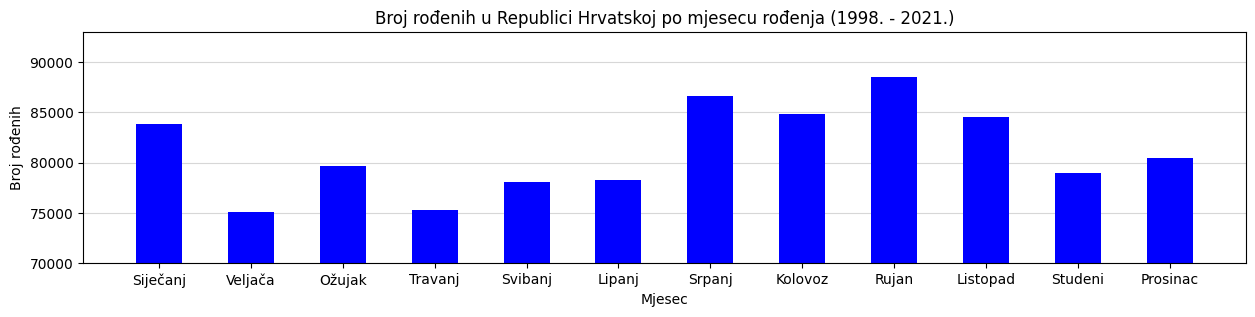

In [34]:
plt.figure(1, [15,3])
plt.bar(broj_rodenih_u_mjesecu_keys, broj_rodenih_u_mjesecu_values, color='blue', width=0.5, zorder=2)
plt.xlabel('Mjesec')
plt.ylabel('Broj rođenih')
plt.ylim(bottom=70000)
plt.grid(True, alpha=0.5, axis='y', zorder=1)
plt.title('Broj rođenih u Republici Hrvatskoj po mjesecu rođenja (1998. - 2021.)')
plt.show()

In [35]:
postotak_po_mjesecu = []

for mjesec in mjeseci:
  postotak_po_mjesecu.append(str(format(round(100 * (broj_rodenih_u_mjesecu[str(mjesec)] / sum(broj_rodenih_u_mjesecu_values)), 2), '.2f')) + '%')


podaci = {
    'Mjesec': mjeseci,
    'Postotak broja rođenih': postotak_po_mjesecu
}

broj_rodenih_u_mjesecu_df = pd.DataFrame(podaci)
broj_rodenih_u_mjesecu_df = broj_rodenih_u_mjesecu_df.set_index('Mjesec')

broj_rodenih_u_mjesecu_df = tabulate(broj_rodenih_u_mjesecu_df, headers=['Mjesec', 'Postotak broja rođenih'], tablefmt='fancy_grid')

print(broj_rodenih_u_mjesecu_df)

╒══════════╤══════════════════════════╕
│ Mjesec   │ Postotak broja rođenih   │
╞══════════╪══════════════════════════╡
│ Siječanj │ 8.60%                    │
├──────────┼──────────────────────────┤
│ Veljača  │ 7.71%                    │
├──────────┼──────────────────────────┤
│ Ožujak   │ 8.18%                    │
├──────────┼──────────────────────────┤
│ Travanj  │ 7.72%                    │
├──────────┼──────────────────────────┤
│ Svibanj  │ 8.02%                    │
├──────────┼──────────────────────────┤
│ Lipanj   │ 8.04%                    │
├──────────┼──────────────────────────┤
│ Srpanj   │ 8.89%                    │
├──────────┼──────────────────────────┤
│ Kolovoz  │ 8.70%                    │
├──────────┼──────────────────────────┤
│ Rujan    │ 9.09%                    │
├──────────┼──────────────────────────┤
│ Listopad │ 8.68%                    │
├──────────┼──────────────────────────┤
│ Studeni  │ 8.10%                    │
├──────────┼──────────────────────────┤


Predviđanje broja rođenih za vremensko razdoblje od 2022. do 2050. godine koristeći model linearne regresije

In [69]:
godine = np.arange (1998, 2021+1)
broj_rodenih = [rodenih_po_godini[godina] for godina in godine]

godine = np.array(godine)
broj_rodenih = np.array(broj_rodenih)

X = torch.from_numpy(godine).unsqueeze(dim=1).float()
Y = torch.from_numpy(broj_rodenih).unsqueeze(dim=1).float()

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X)
    loss = criterion(outputs, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Train Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Train Epoch [100/1000], Loss: 0.3757
Train Epoch [200/1000], Loss: 0.3498
Train Epoch [300/1000], Loss: 0.3493
Train Epoch [400/1000], Loss: 0.3493
Train Epoch [500/1000], Loss: 0.3493
Train Epoch [600/1000], Loss: 0.3493
Train Epoch [700/1000], Loss: 0.3493
Train Epoch [800/1000], Loss: 0.3493
Train Epoch [900/1000], Loss: 0.3493
Train Epoch [1000/1000], Loss: 0.3493


In [72]:
godine_za_predvidanje = np.arange(2022, 2050+1)
godine_za_predvidanje = (godine_za_predvidanje - godine.mean()) / godine.std()
godine_za_predvidanje = torch.from_numpy(godine_za_predvidanje).unsqueeze(dim=1).float()

predikcije = model(godine_za_predvidanje)
predikcije = predikcije * broj_rodenih.std() + broj_rodenih.mean()

godina_pretpostavke = np.arange(2022, 2050+1)
broj_rodenih_pretpostavka = [format(predikcije[i].item(), '.0f') for i in range(len(godine_za_predvidanje))]

podaci = {
    'Godina': godina_pretpostavke,
    'Pretpostavljen broj rođenih': broj_rodenih_pretpostavka
}

pretpostavka_rodenih_df = pd.DataFrame(podaci)
pretpostavka_rodenih_df = pretpostavka_rodenih_df.set_index('Godina')

pretpostavka_rodenih_df = tabulate(pretpostavka_rodenih_df, headers=['Godina', 'Pretpostavljen broj rođenih'], tablefmt='fancy_grid')

print(pretpostavka_rodenih_df)

╒══════════╤═══════════════════════════════╕
│   Godina │   Pretpostavljen broj rođenih │
╞══════════╪═══════════════════════════════╡
│     2022 │                         36183 │
├──────────┼───────────────────────────────┤
│     2023 │                         35831 │
├──────────┼───────────────────────────────┤
│     2024 │                         35478 │
├──────────┼───────────────────────────────┤
│     2025 │                         35126 │
├──────────┼───────────────────────────────┤
│     2026 │                         34774 │
├──────────┼───────────────────────────────┤
│     2027 │                         34421 │
├──────────┼───────────────────────────────┤
│     2028 │                         34069 │
├──────────┼───────────────────────────────┤
│     2029 │                         33717 │
├──────────┼───────────────────────────────┤
│     2030 │                         33364 │
├──────────┼───────────────────────────────┤
│     2031 │                         33012 │
├─────────

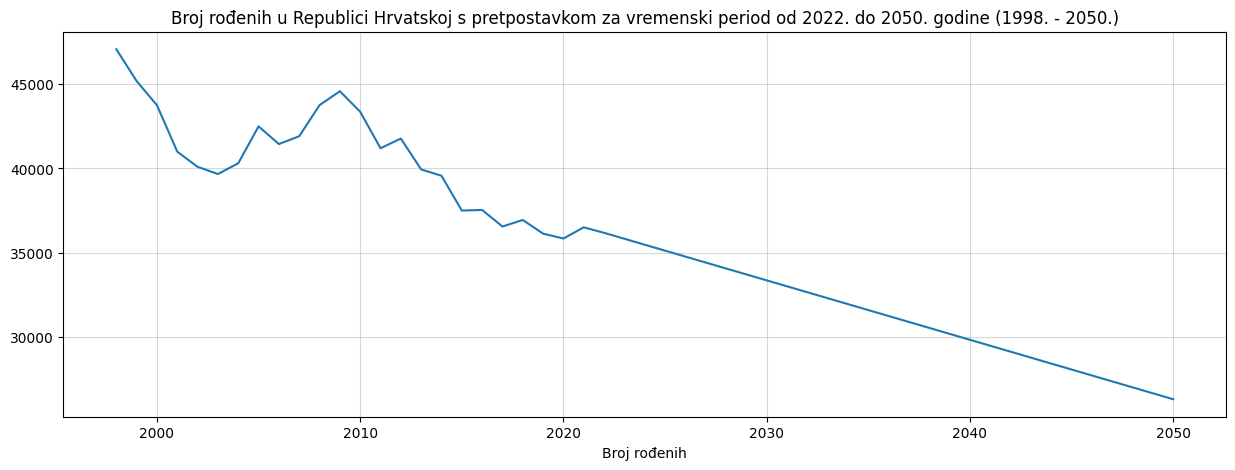

In [73]:
broj_rodenih_s_pretpostavljenim = []
for element in rodenih_po_godini_values:
  broj_rodenih_s_pretpostavljenim.append(int(element))
for element in broj_rodenih_pretpostavka:
  broj_rodenih_s_pretpostavljenim.append(int(element))
godine_s_pretpostavljenim = np.arange(1998, 2050+1)

plt.figure(1, [15, 5])
plt.plot(godine_s_pretpostavljenim, broj_rodenih_s_pretpostavljenim)
plt.grid(True, alpha=0.5)
plt.xlabel('Godine')
plt.xlabel('Broj rođenih')
plt.title('Broj rođenih u Republici Hrvatskoj s pretpostavkom za vremenski period od 2022. do 2050. godine (1998. - 2050.)')
plt.show()